# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset

In [2]:
uber_data=pd.read_csv("C:/Users/Dell/Downloads/Uber Request Data (1).csv")

# dataset first view

In [3]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


# dataset rows and columns

In [4]:
uber_data.shape

(6745, 6)

# dataset information

In [19]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# duplicate values

In [6]:
uber_data.duplicated().sum()

np.int64(0)

In [7]:
uber_data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

# Missing value/ null values

In [8]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [10]:
uber_data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

# Data wrangling

In [22]:
# Convert timestamp columns to datetime
uber_data['Request timestamp'] = pd.to_datetime(uber_data['Request timestamp'], dayfirst=True, errors='coerce')
uber_data['Drop timestamp'] = pd.to_datetime(uber_data['Drop timestamp'], dayfirst=True, errors='coerce')

# Extract hour and day
uber_data['Hour'] = uber_data['Request timestamp'].dt.hour
uber_data['Day'] = uber_data['Request timestamp'].dt.day_name()

# Calculate trip duration (in minutes)
uber_data['Trip Duration'] = (uber_data['Drop timestamp'] - uber_data['Request timestamp']).dt.total_seconds() / 60


# Data Visualization , storytelling and Experimenting with charts: Understand the relationship between variables.

# Chart - 1 [Request count by status]


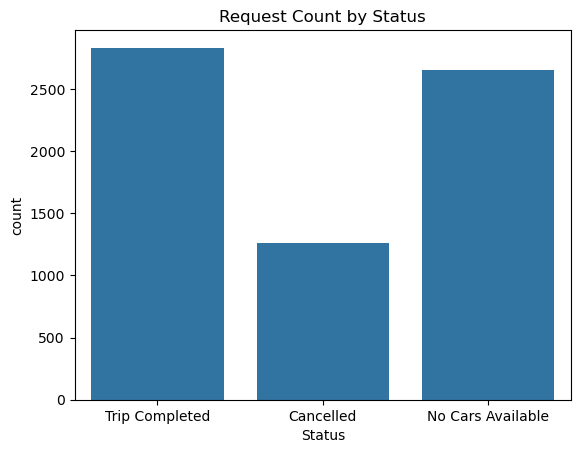

In [23]:
sns.countplot(x='Status', data=uber_data)
plt.title("Request Count by Status")
plt.show()

# chart - 2 [Request by hours]

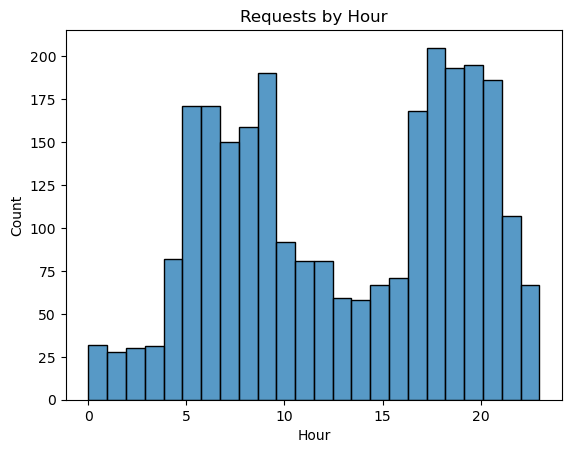

In [24]:
sns.histplot(uber_data['Hour'], bins=24)
plt.title("Requests by Hour")
plt.show()

# chart - 3 [pick up points vs status]

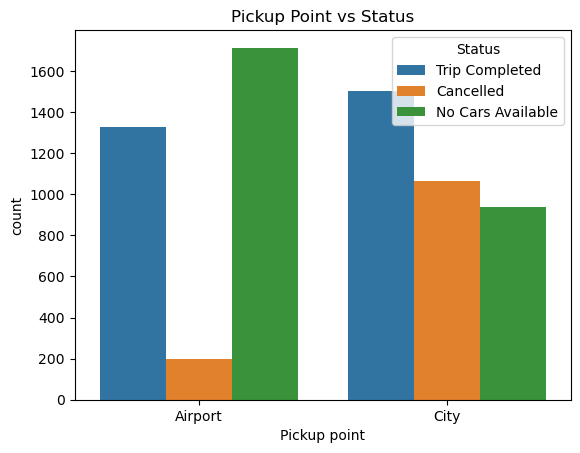

In [25]:
sns.countplot(x='Pickup point', hue='Status', data=uber_data)
plt.title("Pickup Point vs Status")
plt.show()

# chart - 4 Cancelled vs No Cars Available (Line Plot)


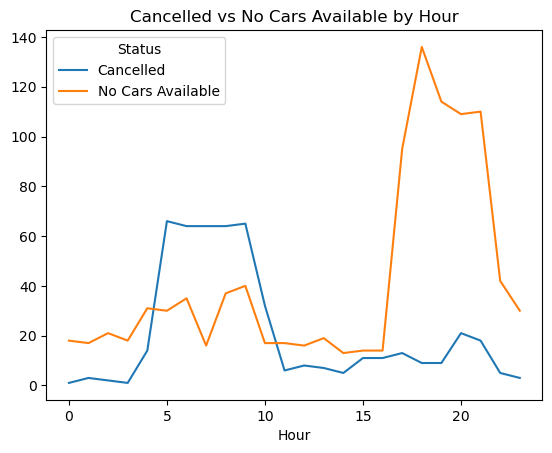

In [26]:
hourly = uber_data.groupby(['Hour', 'Status']).size().unstack().fillna(0)
hourly[['Cancelled', 'No Cars Available']].plot()
plt.title("Cancelled vs No Cars Available by Hour")
plt.show()

# chart - 5 Top 10 Most Active Drivers


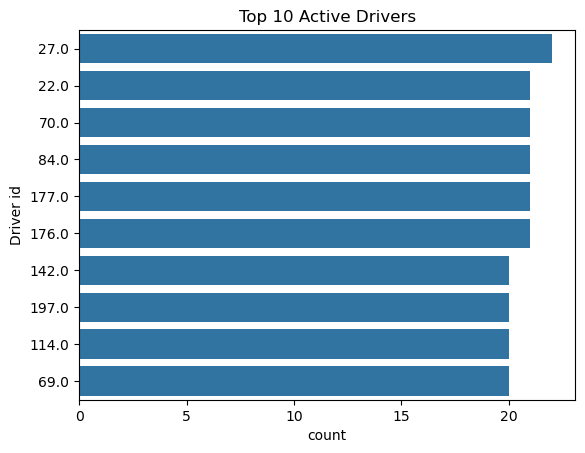

In [27]:
sns.countplot(y='Driver id', data=uber_data[uber_data['Driver id'].notna()],
              order=uber_data['Driver id'].value_counts().iloc[:10].index)
plt.title("Top 10 Active Drivers")
plt.show()


# chart - 6 Completed Trips by Hour

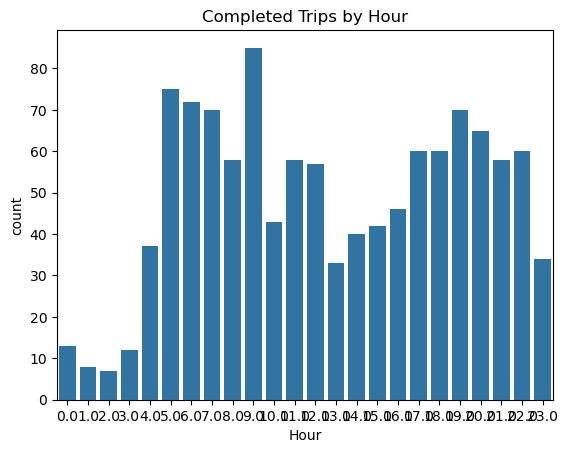

In [28]:
sns.countplot(x='Hour', data=uber_data[uber_data['Status'] == 'Trip Completed'])
plt.title("Completed Trips by Hour")
plt.show()


# chart - 7 Cancelled Requests by Hour

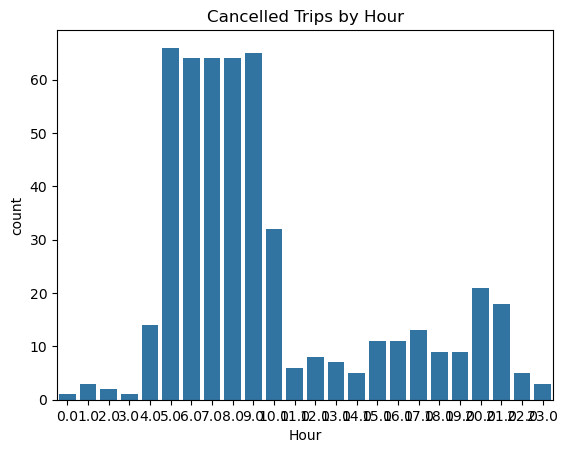

In [29]:
sns.countplot(x='Hour', data=uber_data[uber_data['Status'] == 'Cancelled'])
plt.title("Cancelled Trips by Hour")
plt.show()

 # chart - 8 Trip Status by Hour (Stacked Bar)


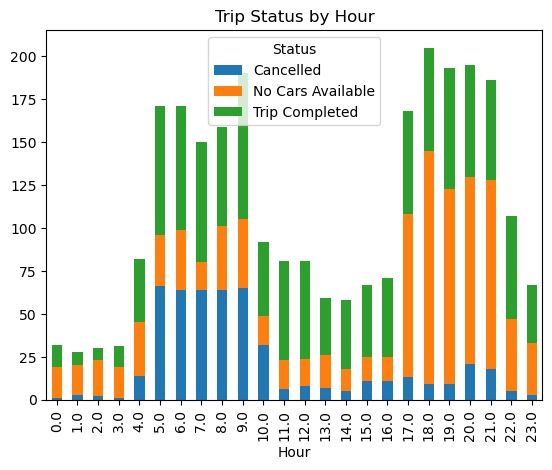

In [30]:
pd.crosstab(uber_data['Hour'], uber_data['Status']).plot(kind='bar', stacked=True)
plt.title("Trip Status by Hour")
plt.show()